### Adjust plotting for dark theme

In [2]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

     |████████████████████████████████| 7.0MB 13.2MB/s 
     |████████████████████████████████| 9.5MB 34.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.1.5 which is incompatible.
  Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1


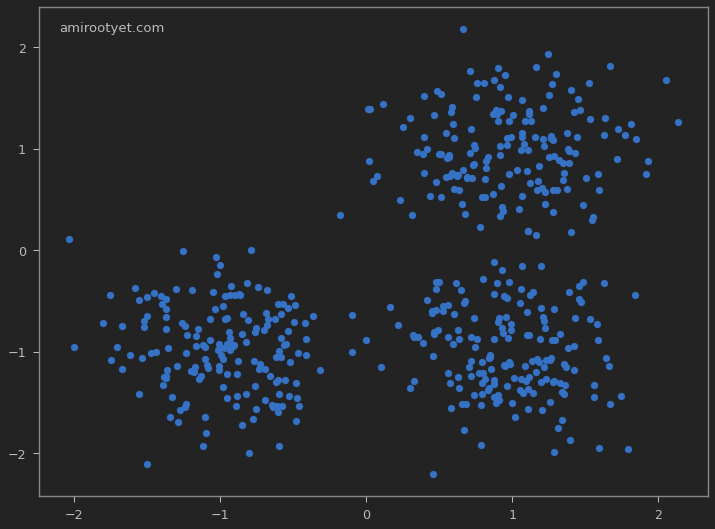

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, y_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=31337)

plt.figure(figsize=(12,9))
plt.annotate('amirootyet.com', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(X[:, 0], X[:, 1], s=50)

In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [44]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
y_pred = clusterer.fit_predict(X)
y_pred

array([ 0,  0,  0,  0, -1,  0,  1,  2,  1,  2,  2,  2,  2,  2,  0,  1,  0,
        1,  2,  1,  1,  0,  2,  0,  0,  0,  0,  1,  1,  2,  2,  0,  0,  2,
        0,  0,  0,  0,  1,  1,  1,  1,  0,  2,  0,  2,  2,  0,  1,  0,  0,
        0,  2,  2,  0,  1,  2,  2,  2,  1,  0,  1,  2,  2, -1,  0,  0,  2,
        2,  0,  2,  0,  2,  1,  0,  2,  2,  0,  0,  2,  2,  2,  2,  1,  1,
        1,  1,  1,  2,  0, -1,  0, -1,  0,  0,  1,  0,  0,  1,  1,  0,  1,
        2,  1,  0,  0,  0,  1,  0,  0,  2, -1,  0,  0,  0,  0,  0,  2,  2,
        1,  0,  0,  1,  2,  1,  2,  0,  0,  2,  2,  1,  0,  2,  2,  0,  2,
        1,  1,  0,  1,  0,  2,  2,  2,  0,  1,  1,  0,  1,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  2,  2,  0,  1,  1,  2,  2,  2,  1,  1,  1,  2,
        1,  1,  0,  2,  0,  1,  1, -1,  2,  0,  1,  2,  0,  0,  1,  1,  1,
       -1,  2,  2,  2,  1,  2,  0,  0,  0,  1,  1,  0,  2,  0,  2,  2,  1,
        0,  0,  1,  2,  1,  2,  1,  2,  2,  2,  1,  1,  2,  1,  2,  2,  2,
        1,  1,  1,  2,  0

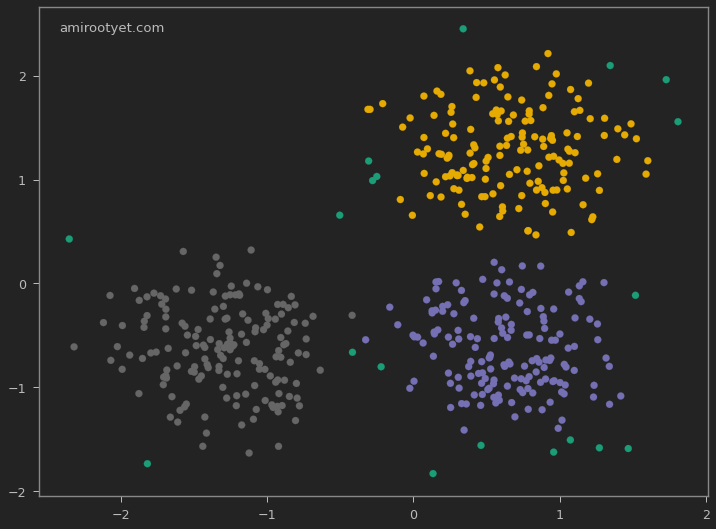

In [45]:
plt.figure(figsize=(12,9))
plt.annotate('amirootyet.com', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='Dark2')

### Accentuating outliers

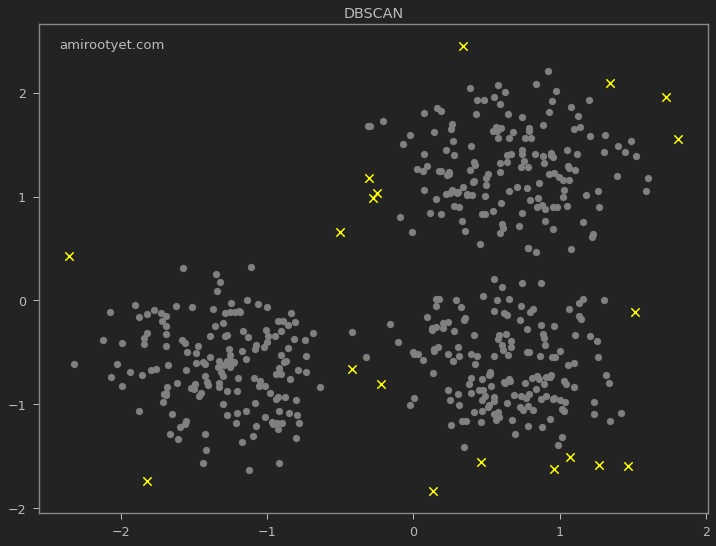

In [46]:
plt.figure(figsize=(12,9))
plt.annotate('amirootyet.com', xy=(0.03, 0.95), xycoords='axes fraction')
plt.title('DBSCAN')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c='yellow', s=70, marker='x') ## plotting outliers in yellow with size 70
plt.scatter(X[y_pred!=-1, 0], X[y_pred!=-1, 1], c='gray', s=50) ## plotting cluster points


### Clustering with HDBSCAN

In [26]:
!pip install hdbscan


     |████████████████████████████████| 4.7MB 13.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301836 sha256=ccc5409c43a1de68491711e6531ca741876f2e92a3b2e7d90f29523c202508a9
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [27]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=31337)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [37]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(min_cluster_size=5)
y_pred = clusterer.fit_predict(X)
y_pred

array([ 2,  2, -1,  2, -1,  2,  1,  0,  1,  0,  0,  0,  0,  0,  2,  1,  2,
        1,  0,  1,  1,  2,  0,  2,  2,  2, -1,  1,  1,  0,  0,  2,  2,  0,
        2,  2,  2,  2,  1,  1,  1,  1,  2,  0,  2,  0,  0,  2,  1,  2,  2,
        2,  0,  0,  2,  1,  0,  0,  0,  1,  2,  1,  0,  0, -1,  2,  2,  0,
        0,  2,  0,  2,  0,  1,  2,  0,  0,  2,  2,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  0,  2, -1,  2, -1,  2,  2,  1,  2,  2,  1,  1,  2,  1,
        0,  1,  2,  2,  2,  1,  2,  2,  0, -1,  2,  2,  2,  2,  2,  0, -1,
        1,  2,  2,  1,  0,  1,  0,  2,  2,  0,  0,  1,  2,  0,  0,  2,  0,
        1,  1,  2,  1,  2,  0,  0,  0,  2,  1,  1,  2,  1,  2,  2,  2,  1,
        2,  1,  2,  2,  1,  0,  0,  2, -1,  1,  0,  0,  0,  1,  1,  1,  0,
        1,  1,  2,  0,  2,  1,  1, -1,  0,  2,  1,  0,  2,  2,  1,  1,  1,
       -1,  0,  0,  0,  1,  0,  2,  2, -1,  1,  1,  2,  0,  2,  0,  0,  1,
        2,  2,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,
        1,  1,  1,  0,  2

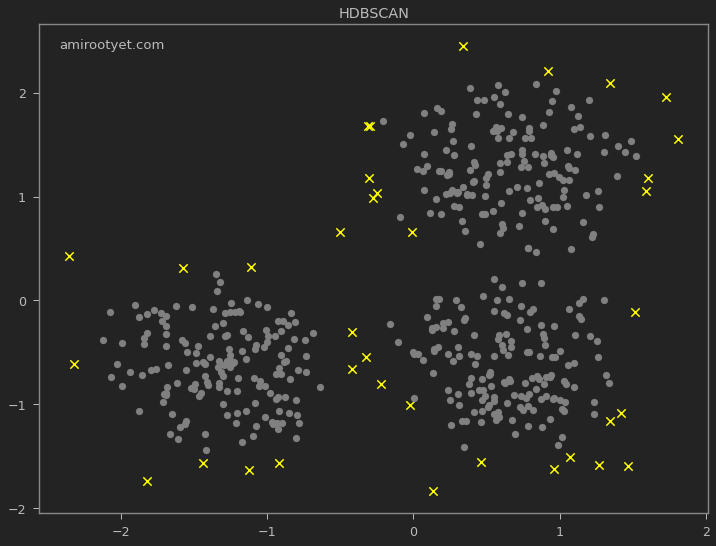

In [42]:
plt.figure(figsize=(12,9))
plt.annotate('amirootyet.com', xy=(0.03, 0.95), xycoords='axes fraction')
plt.title('HDBSCAN')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c='yellow', s=70, marker='x') ## plotting outliers in yellow with size 70
plt.scatter(X[y_pred!=-1, 0], X[y_pred!=-1, 1], c='gray', s=50) ## plotting cluster points


### Additional links

 - https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
 - https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744